In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Non Demented: 10000 images
Mild Dementia: 8913 images
Very Mild Dementia: 10000 images
Moderate Dementia: 6635 images
Sample Non Demented images: ['OAS1_0216_MR1_mpr-2_118.jpg', 'OAS1_0169_MR1_mpr-3_143.jpg', 'OAS1_0259_MR1_mpr-1_130.jpg', 'OAS1_0321_MR1_mpr-2_102.jpg', 'OAS1_0145_MR2_mpr-3_123.jpg']
Sample Mild Dementia images: ['aug_0_1705.jpg', 'aug_0_8898.jpg', 'aug_0_2180.jpg', 'aug_0_1582.jpg', 'aug_0_3748.jpg']
Sample Very Mild Dementia images: ['OAS1_0286_MR1_mpr-1_157.jpg', 'OAS1_0022_MR1_mpr-3_145.jpg', 'OAS1_0082_MR1_mpr-4_106.jpg', 'OAS1_0015_MR1_mpr-3_115.jpg', 'OAS1_0166_MR1_mpr-3_129.jpg']
Sample Moderate Dementia images: ['aug_0_6570.jpg', 'aug_0_1908.jpg', 'aug_0_8235.jpg', 'aug_0_7695.jpg', 'aug_0_241.jpg']


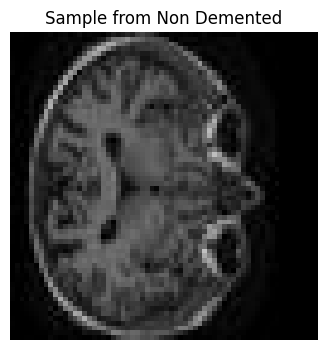

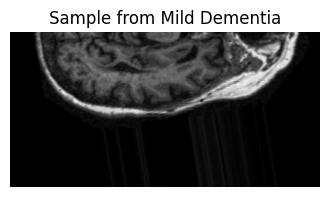

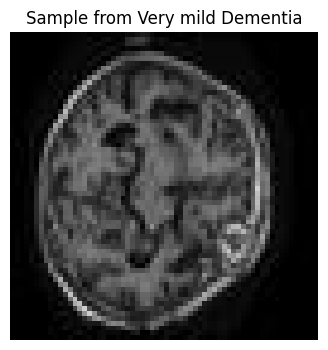

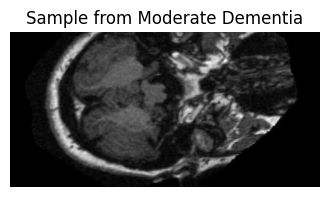

In [ ]:
import os
import PIL.Image
import matplotlib.pyplot as plt

# Define the base directory where your dataset is stored
img_path = '/content/drive/MyDrive/Resampled'

# List all images for each category
non_demented_imgs = os.listdir(os.path.join(img_path, 'Non Demented'))
mild_dementia_imgs = os.listdir(os.path.join(img_path, 'Mild Dementia'))
very_mild_dementia_imgs = os.listdir(os.path.join(img_path, 'Very mild Dementia'))
moderate_dementia_imgs = os.listdir(os.path.join(img_path, 'Moderate Dementia'))

# Display the number of images in each category
print(f"Non Demented: {len(non_demented_imgs)} images")
print(f"Mild Dementia: {len(mild_dementia_imgs)} images")
print(f"Very Mild Dementia: {len(very_mild_dementia_imgs)} images")
print(f"Moderate Dementia: {len(moderate_dementia_imgs)} images")

# Optional: Display some image filenames
print("Sample Non Demented images:", non_demented_imgs[:5])
print("Sample Mild Dementia images:", mild_dementia_imgs[:5])
print("Sample Very Mild Dementia images:", very_mild_dementia_imgs[:5])
print("Sample Moderate Dementia images:", moderate_dementia_imgs[:5])

# Displaying one image from each category
categories = ['Non Demented', 'Mild Dementia', 'Very mild Dementia', 'Moderate Dementia']
for category in categories:
    file_path = os.path.join(img_path, category, os.listdir(os.path.join(img_path, category))[0])
    img = PIL.Image.open(file_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f"Sample from {category}")
    plt.axis('off')
    plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
from collections import Counter

# Define the base directory where your dataset is stored
base_dir = '/content/drive/MyDrive/Resampled'

# Create a list to store file paths and their corresponding labels
list_files = []

# Iterate through each subdirectory (i.e., each class label)
for dir_name in os.listdir(base_dir):
    aux_dir = os.path.join(base_dir, dir_name)

    # Check if it's a directory
    if os.path.isdir(aux_dir):
        for img in os.listdir(aux_dir):
            img_path = os.path.join(aux_dir, img)
            # Append the image path and its label (the directory name)
            list_files.append([img_path, dir_name])

# Create a DataFrame
df = pd.DataFrame(list_files, columns=['id', 'label'])
print(df.head())  # Display first few rows of the DataFrame
print(df.describe())  # Summary of the DataFrame

# Function to plot frequency of each class
def frequency_plot(df):
    freq_abs = Counter(df['label'])
    freq_a = pd.DataFrame.from_dict(freq_abs, orient='index').reset_index()
    total = len(df.index)
    freq_r = freq_a[0] / total
    freq_a['Percentage'] = freq_r
    freq_a.columns = ['Label', 'No of images', 'Percentage']
    return freq_a

# Generate the frequency plot data
frequency_data = frequency_plot(df)
print(frequency_data)


                                                  id          label
0  /content/drive/MyDrive/Resampled/Mild Dementia...  Mild Dementia
1  /content/drive/MyDrive/Resampled/Mild Dementia...  Mild Dementia
2  /content/drive/MyDrive/Resampled/Mild Dementia...  Mild Dementia
3  /content/drive/MyDrive/Resampled/Mild Dementia...  Mild Dementia
4  /content/drive/MyDrive/Resampled/Mild Dementia...  Mild Dementia
                                                       id         label
count                                               35548         35548
unique                                              35548             4
top     /content/drive/MyDrive/Resampled/Very mild Dem...  Non Demented
freq                                                    1         10000
                Label  No of images  Percentage
0       Mild Dementia          8913    0.250731
1        Non Demented         10000    0.281310
2   Moderate Dementia          6635    0.186649
3  Very mild Dementia         10000    0

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

def split_dataset(df, test_size=0.25, random_state=101):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    df = df.reset_index(drop=True)

    for train_index, test_index in sss.split(df['id'], df['label']):
        X_train, X_test = df.loc[train_index, 'id'], df.loc[test_index, 'id']
        y_train, y_test = df.loc[train_index, 'label'], df.loc[test_index, 'label']
        train_df = pd.concat([X_train, y_train], axis=1)
        test_df = pd.concat([X_test, y_test], axis=1)

    return train_df, test_df

# First, split into train and temp (temp will be further split into validation and test)
train_df, temp_df = split_dataset(df, test_size=0.25)

# Now split the temp_df into validation and test
valid_df, test_df = split_dataset(temp_df, test_size=0.5)

# Print the sizes of the splits
print(f"Training Set: {len(train_df)} images")
print(f"Validation Set: {len(valid_df)} images")
print(f"Test Set: {len(test_df)} images")


# Print the first few rows of each split
print("Training DataFrame:")
print(train_df.head())
print("Validation DataFrame:")
print(valid_df.head())
print("Test DataFrame:")
print(test_df.head())


Training Set: 26661 images
Validation Set: 4443 images
Test Set: 4444 images
Training DataFrame:
                                                      id               label
19959  /content/drive/MyDrive/Resampled/Moderate Deme...   Moderate Dementia
22300  /content/drive/MyDrive/Resampled/Moderate Deme...   Moderate Dementia
25574  /content/drive/MyDrive/Resampled/Very mild Dem...  Very mild Dementia
20005  /content/drive/MyDrive/Resampled/Moderate Deme...   Moderate Dementia
10552  /content/drive/MyDrive/Resampled/Non Demented/...        Non Demented
Validation DataFrame:
                                                     id              label
5871  /content/drive/MyDrive/Resampled/Non Demented/...       Non Demented
3742  /content/drive/MyDrive/Resampled/Moderate Deme...  Moderate Dementia
6989  /content/drive/MyDrive/Resampled/Moderate Deme...  Moderate Dementia
8338  /content/drive/MyDrive/Resampled/Mild Dementia...      Mild Dementia
480   /content/drive/MyDrive/Resampled/Non D

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32

# Define the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating train generator
print("Creating train generator...")
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='id',  # Column in the dataframe containing the full paths
    y_col='label',  # Column in the dataframe containing the labels
    target_size=(224, 224),  # Image size
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    seed=5,
    shuffle=True,
    class_mode='categorical'
)

# Creating validation generator
print("\nCreating validation generator...")
val_generator = val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='id',
    y_col='label',
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    seed=5,
    shuffle=True,
    class_mode='categorical'
)

# Creating test generator
print("\nCreating test generator...")
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='id',
    y_col='label',
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    seed=5,
    shuffle=False,
    class_mode='categorical'
)


Creating train generator...
Found 26661 validated image filenames belonging to 4 classes.

Creating validation generator...
Found 4443 validated image filenames belonging to 4 classes.

Creating test generator...
Found 4444 validated image filenames belonging to 4 classes.


In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.3 MB/s eta 0:00:00


# **ResNet50**

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,689,988 (98.00 MB)

 Trainable params: 25,636,868 (97.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

Sat Aug 24 22:39:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              50W / 400W |  36653MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


834/834 ━━━━━━━━━━━━━━━━━━━━ 5112s 6s/step - accuracy: 0.8112 - loss: 0.4236 - precision_1: 0.8242 - recall_1: 0.7980 - val_accuracy: 0.2928 - val_loss: 6.5162 - val_precision_1: 0.2928 - val_recall_1: 0.2928 - learning_rate: 1.0000e-04
Epoch 2/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 346s 411ms/step - accuracy: 0.8973 - loss: 0.2356 - precision_1: 0.8979 - recall_1: 0.8963 - val_accuracy: 0.8917 - val_loss: 0.2342 - val_precision_1: 0.8921 - val_recall_1: 0.8915 - learning_rate: 1.0000e-04
Epoch 3/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 342s 407ms/step - accuracy: 0.9106 - loss: 0.2123 - precision_1: 0.9109 - recall_1: 0.9103 - val_accuracy: 0.9050 - val_loss: 0.2081 - val_precision_1: 0.9050 - val_recall_1: 0.9048 - learning_rate: 1.0000e-04
Epoch 4/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 342s 407ms/step - accuracy: 0.9305 - loss: 0.1659 - precision_1: 0.9308 - recall_1: 0.9303 - val_accuracy: 0.8017 - val_loss: 0.7861 - val_precision_1: 0.8020 - val_recall_1: 0.8015 - learning_rate: 1.0000e-04
Epoch 5/10
83

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 771s 6s/step
                    precision    recall  f1-score   support

     Mild Dementia       1.00      0.99      1.00      1114
 Moderate Dementia       0.99      1.00      1.00       830
      Non Demented       0.95      0.94      0.95      1250
Very mild Dementia       0.94      0.96      0.95      1250

          accuracy                           0.97      4444
         macro avg       0.97      0.97      0.97      4444
      weighted avg       0.97      0.97      0.97      4444



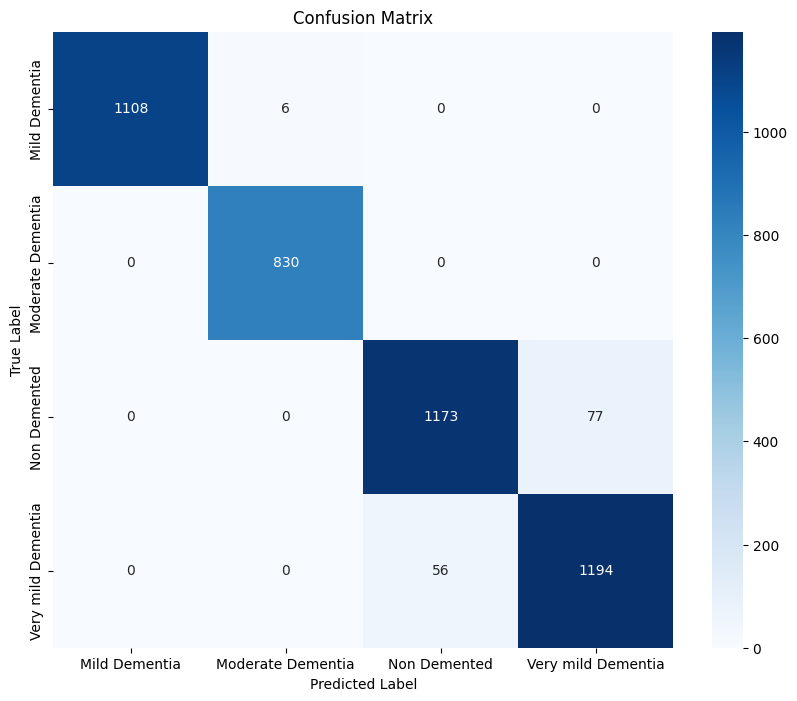

In [ ]:
import tensorflow as tf
from tensorflow.keras import mixed_precision

# Set the mixed precision policy to 'mixed_float16'
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import shap
import seaborn as sns
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
# Load the pre-trained ResNet50 model without the top classification layer
def build_resnet50(input_shape=(224, 224, 3), num_classes=4):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze the layers of the base model to retain the learned features
    base_model.trainable = True

    # Add custom layers on top of the base model
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model

# Build and compile the ResNet50 model
model = build_resnet50()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()

# Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
!nvidia-smi

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

# Calculate F1 Score
val_predictions = model.predict(val_generator)
val_predictions = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes

f1 = f1_score(val_true_labels, val_predictions, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Evaluate the model on the test set and generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Classification report
class_labels = list(test_generator.class_indices.keys())  # Get the class labels
report = classification_report(y_true, y_pred, target_names=class_labels)

# Print the classification report
print(report)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

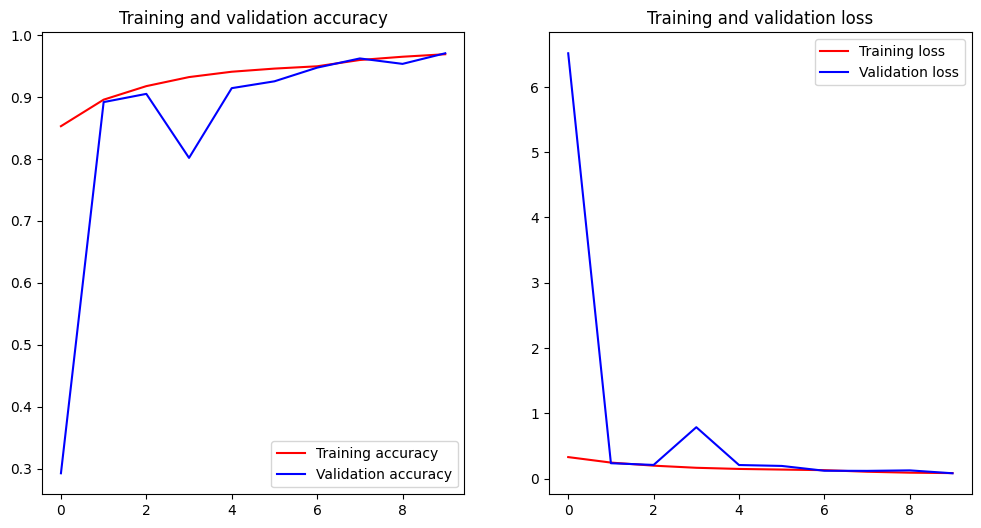

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Define the number of epochs based on the training history
epochs = range(len(history.history['accuracy']))

# Plotting
plt.figure(figsize=(12, 6))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


## **Inception ResNet-V2**

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 55,125,732 (210.29 MB)

 Trainable params: 55,065,188 (210.06 MB)

 Non-trainable params: 60,544 (236.50 KB)

Epoch 1/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 653s 545ms/step - accuracy: 0.7984 - loss: 0.4366 - precision_2: 0.8223 - recall_2: 0.7682 - val_accuracy: 0.9014 - val_loss: 0.2080 - val_precision_2: 0.9026 - val_recall_2: 0.9007 - learning_rate: 1.0000e-04
Epoch 2/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 346s 411ms/step - accuracy: 0.9075 - loss: 0.2162 - precision_2: 0.9080 - recall_2: 0.9065 - val_accuracy: 0.9050 - val_loss: 0.2323 - val_precision_2: 0.9050 - val_recall_2: 0.9050 - learning_rate: 1.0000e-04
Epoch 3/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 346s 412ms/step - accuracy: 0.9283 - loss: 0.1704 - precision_2: 0.9285 - recall_2: 0.9280 - val_accuracy: 0.9379 - val_loss: 0.1843 - val_precision_2: 0.9379 - val_recall_2: 0.9379 - learning_rate: 1.0000e-04
Epoch 4/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 346s 411ms/step - accuracy: 0.9430 - loss: 0.1408 - precision_2: 0.9432 - recall_2: 0.9429 - val_accuracy: 0.9622 - val_loss: 0.0959 - val_precision_2: 0.9622 - val_recall_2: 0.9622 - learning_rate: 1.0000e-04


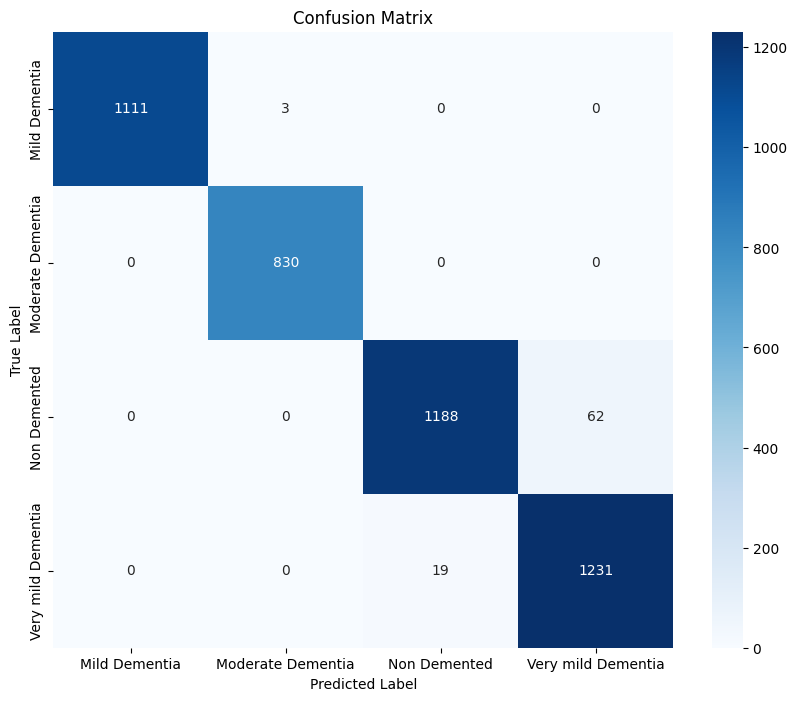

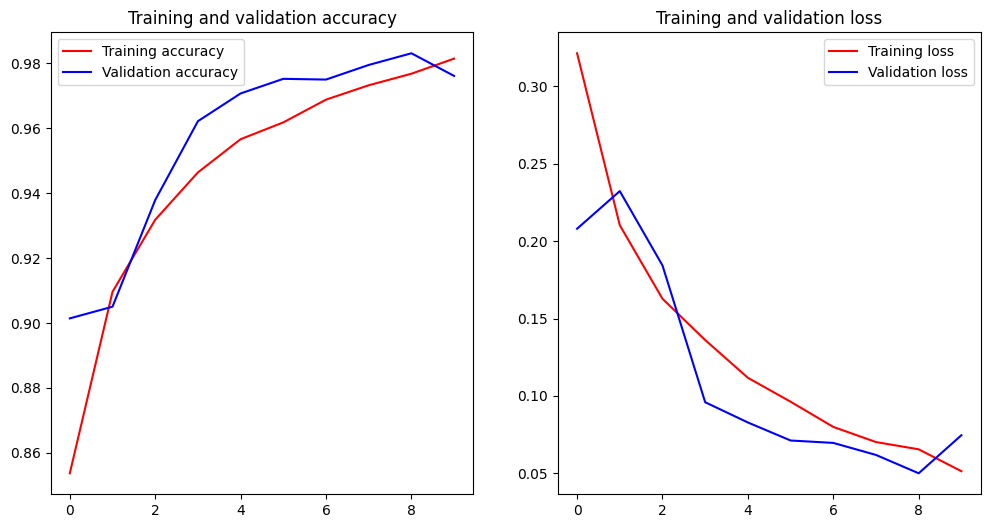

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import mixed_precision

# Set the mixed precision policy to 'mixed_float16'
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import shap
import seaborn as sns

# Load the pre-trained InceptionResNetV2 model without the top classification layer
def build_inception_resnet(input_shape=(224, 224, 3), num_classes=4):
    base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)

    # UnFreeze the layers of the base model to retain the learned features
    base_model.trainable = True

    # Add custom layers on top of the base model
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model

# Build and compile the InceptionResNetV2 model
model = build_inception_resnet()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()

# Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

# Calculate F1 Score
val_predictions = model.predict(val_generator)
val_predictions = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes

f1 = f1_score(val_true_labels, val_predictions, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Evaluate the model on the test set and generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Classification report
class_labels = list(test_generator.class_indices.keys())  # Get the class labels
report = classification_report(y_true, y_pred, target_names=class_labels)

# Print the classification report
print(report)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plotting training history
epochs = range(len(history.history['accuracy']))

# Plotting
plt.figure(figsize=(12, 6))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


SHAP values shape: [(224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4), (224, 224, 3, 4)]


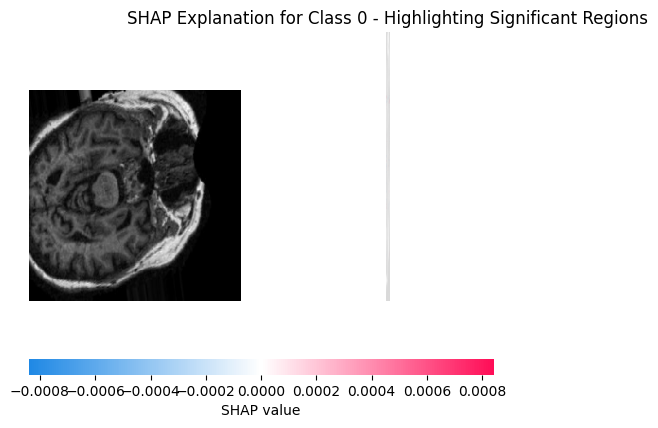

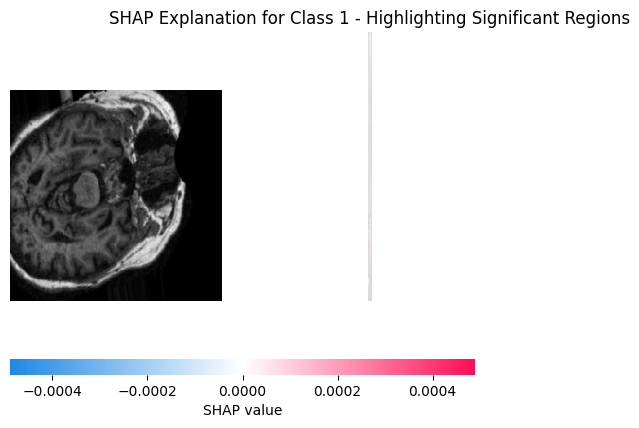

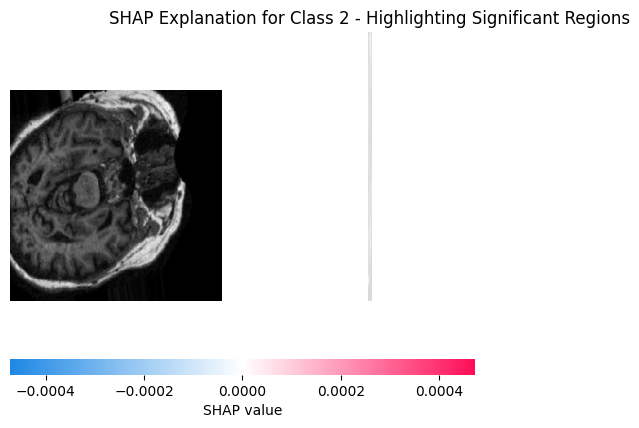

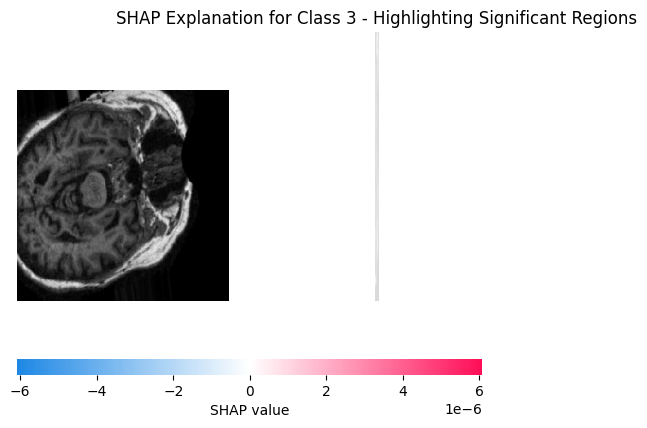

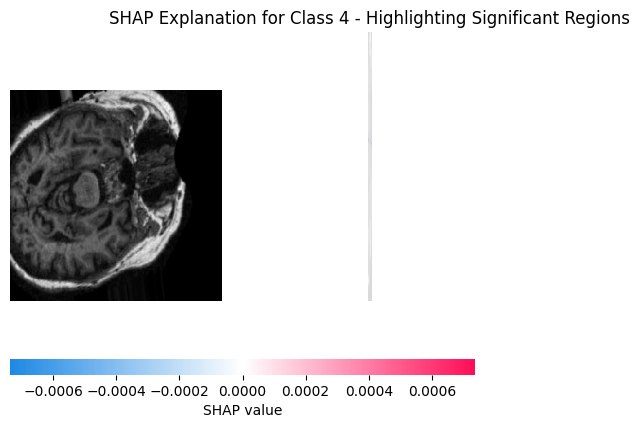

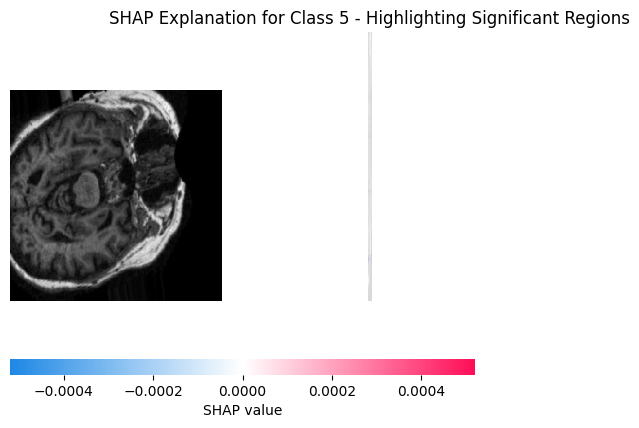

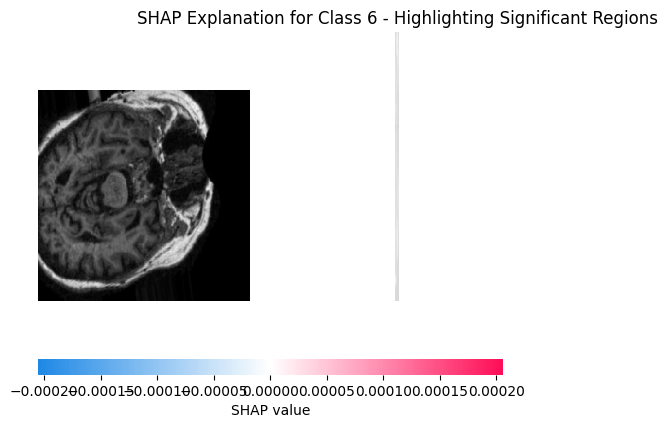

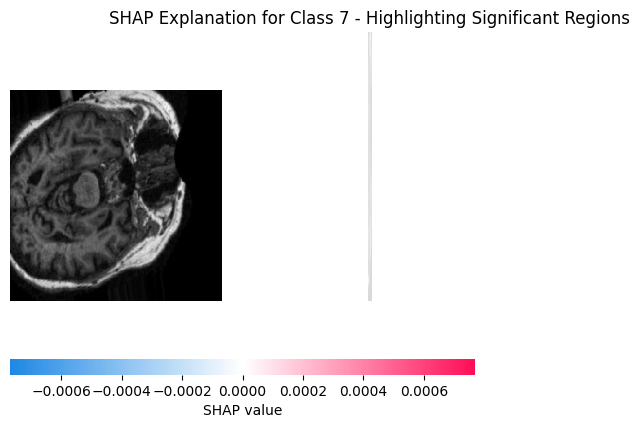

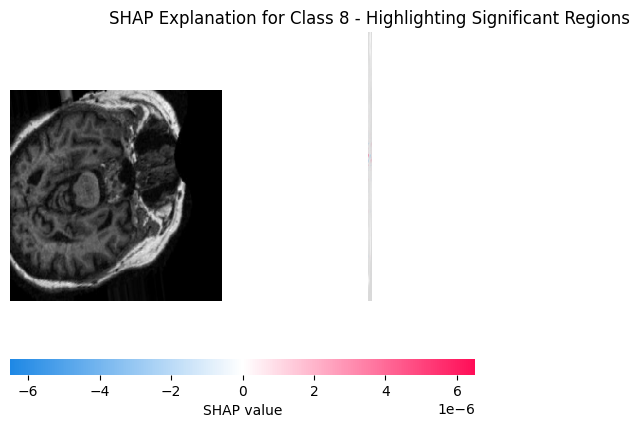

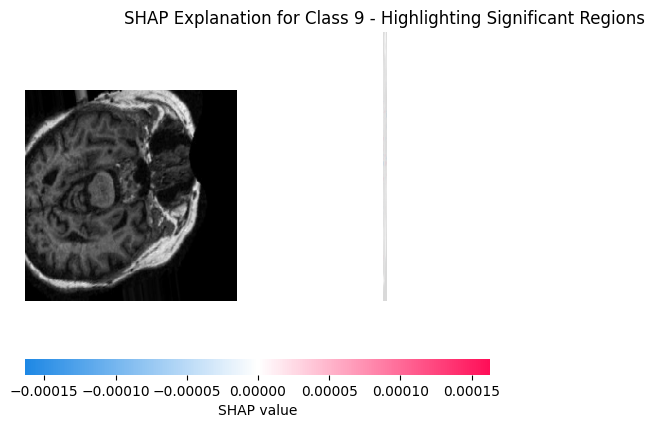

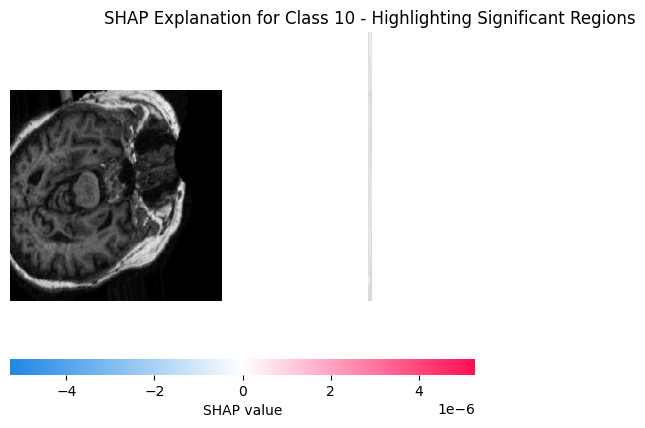

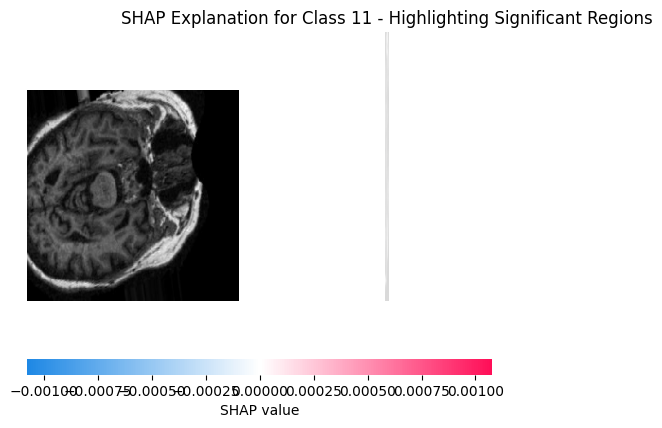

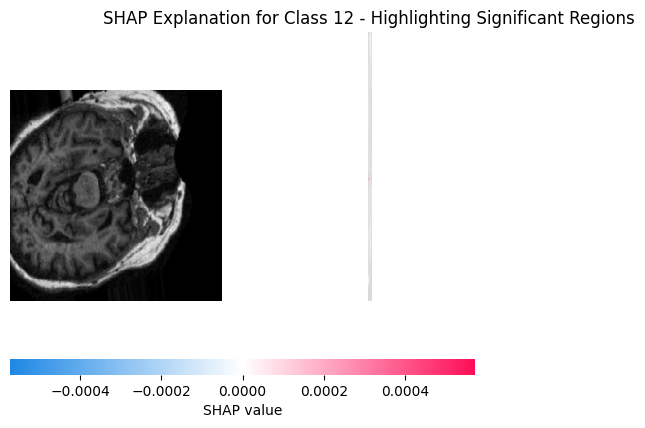

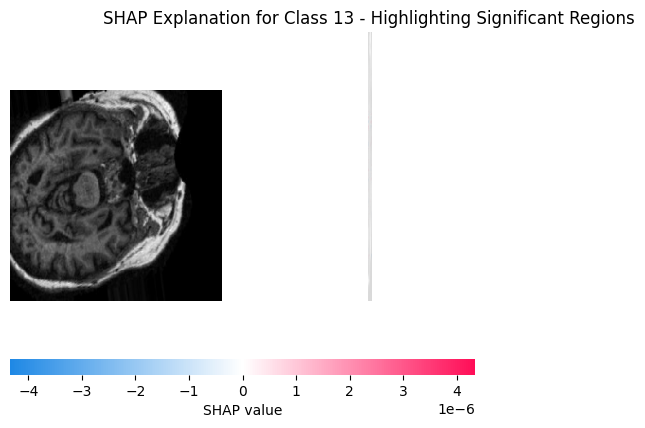

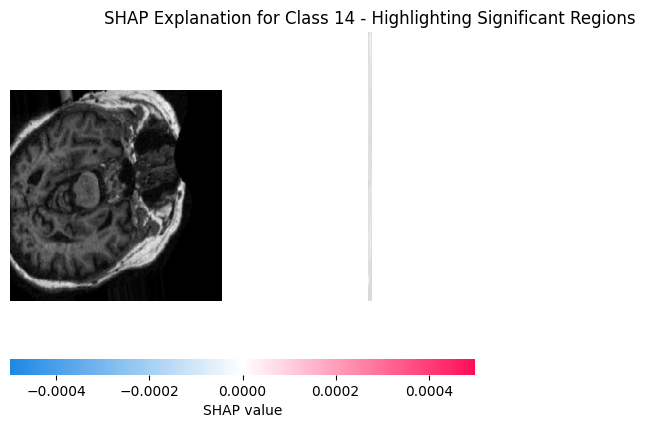

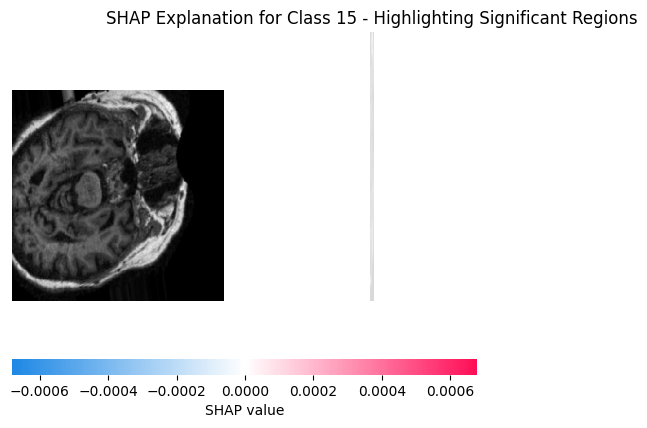

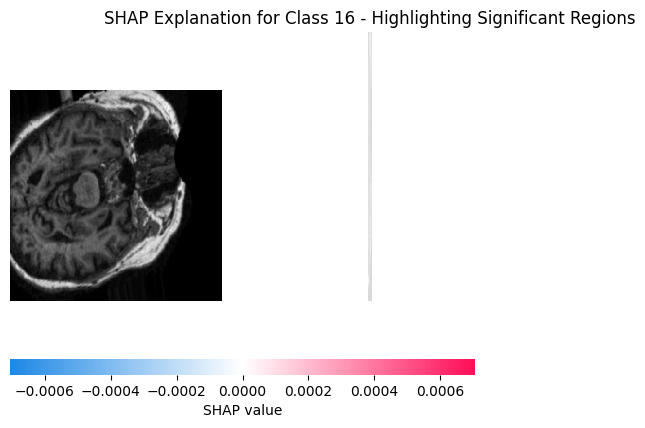

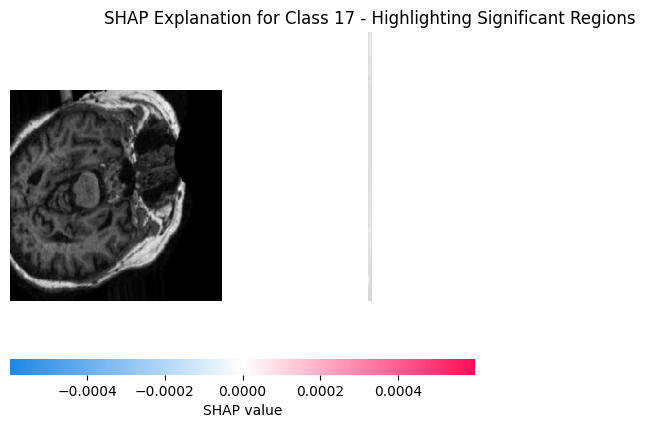

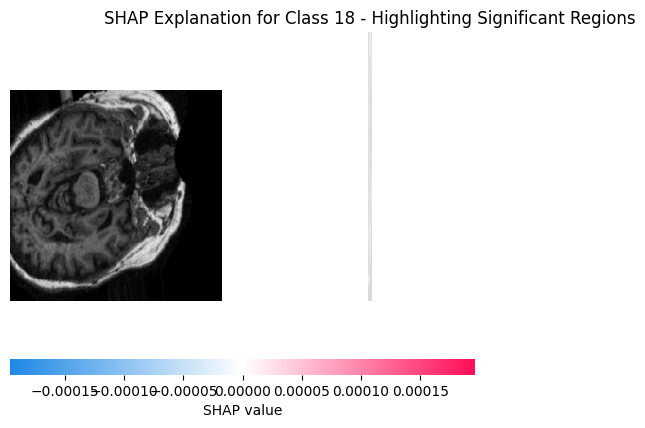

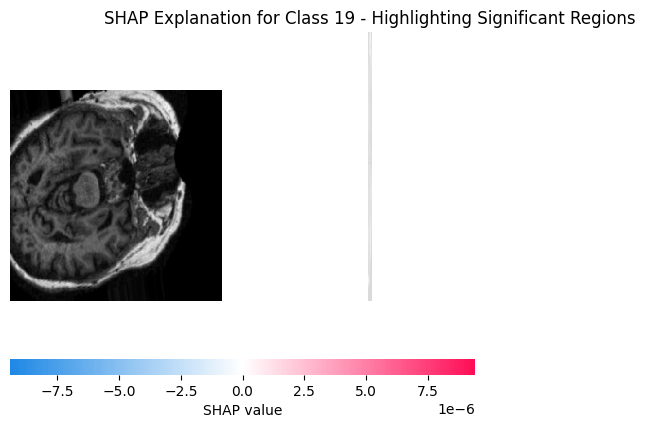

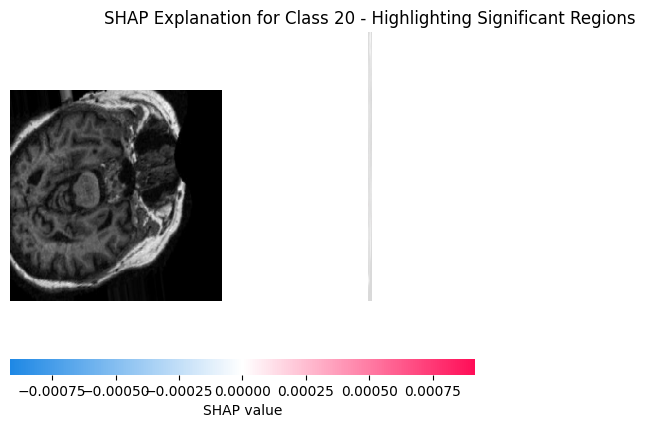

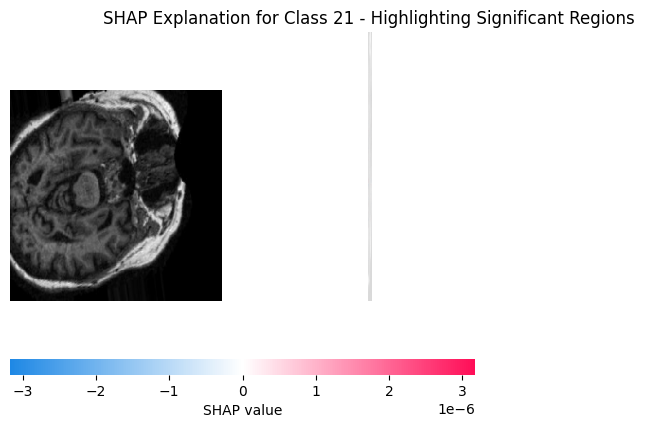

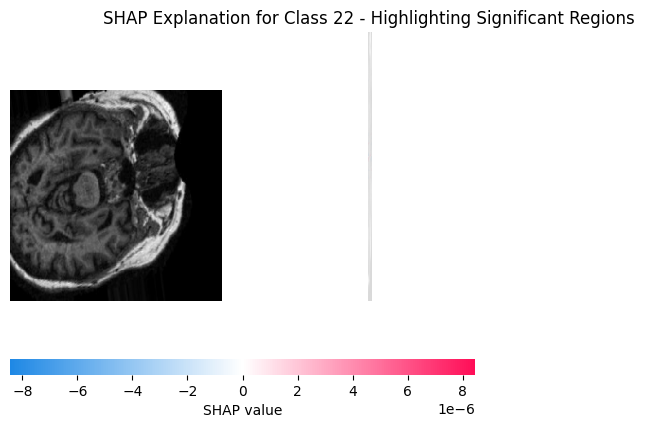

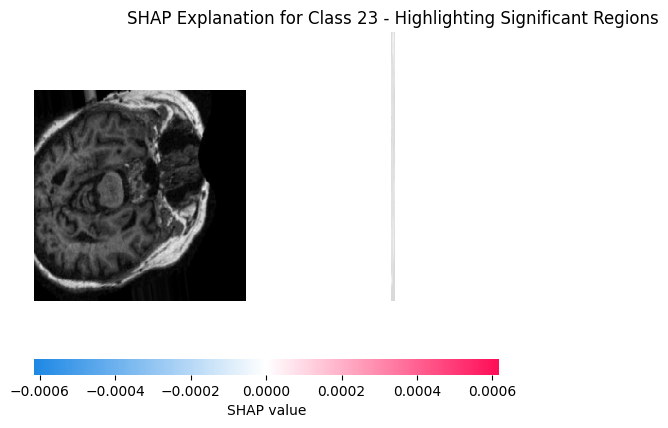

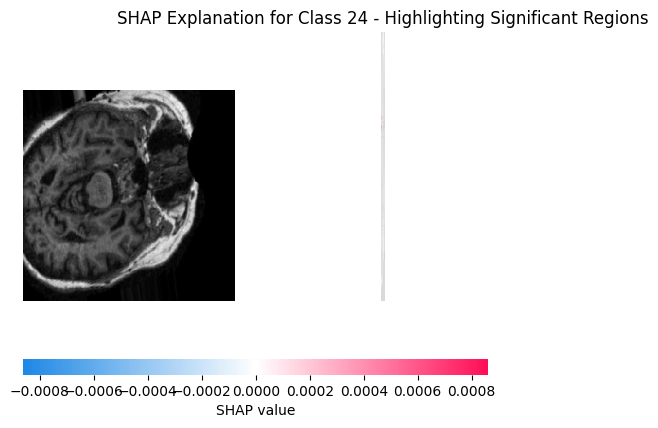

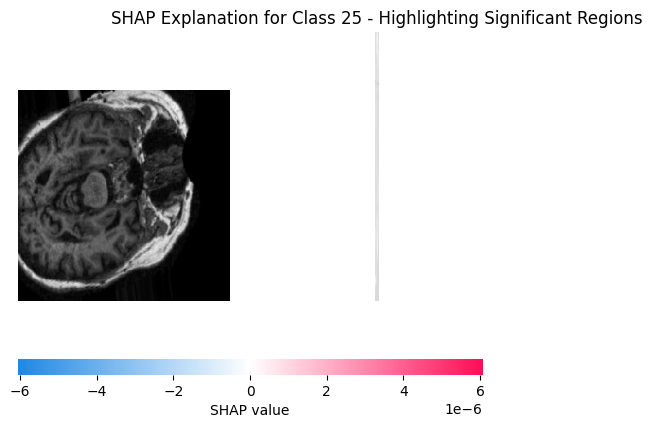

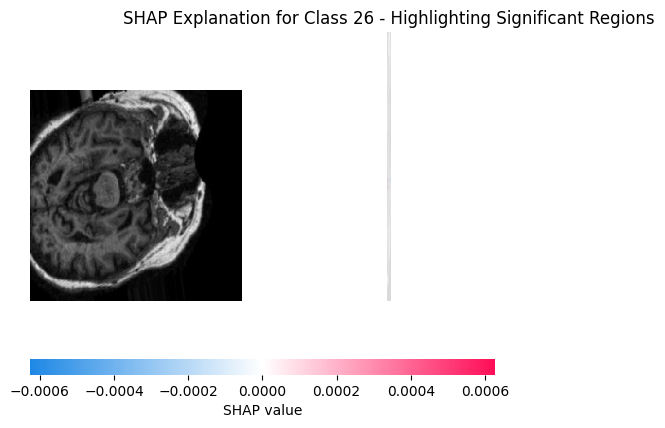

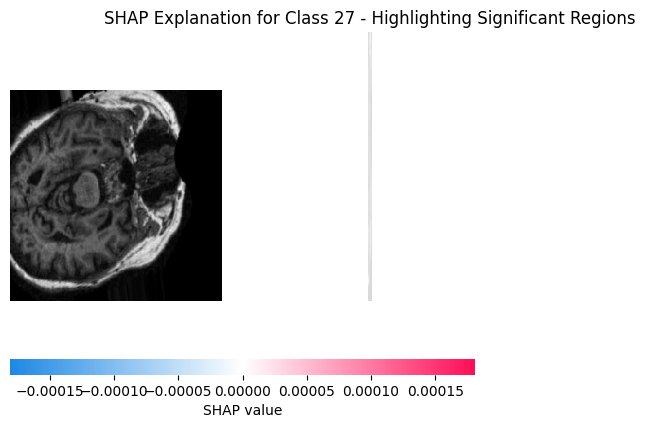

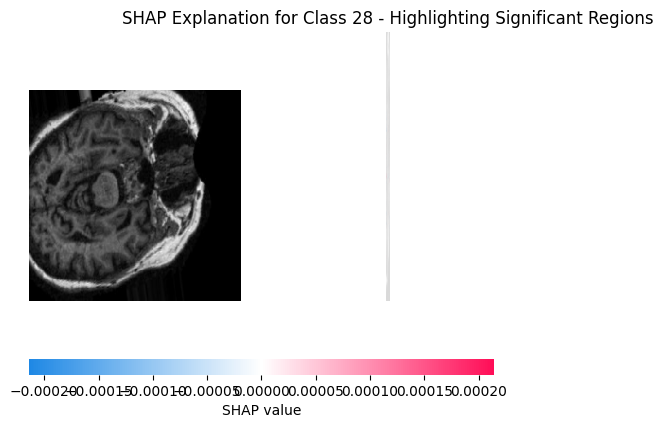

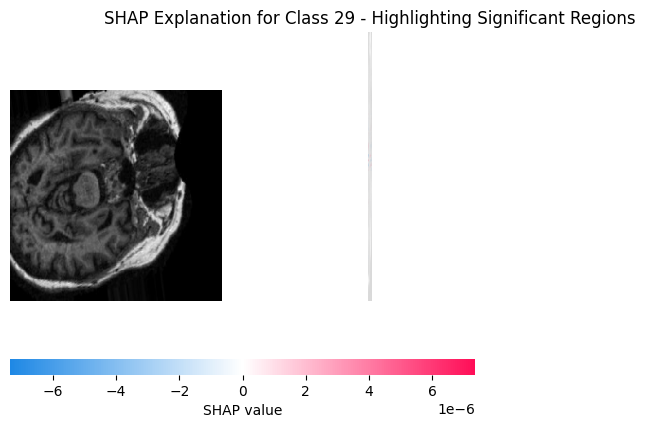

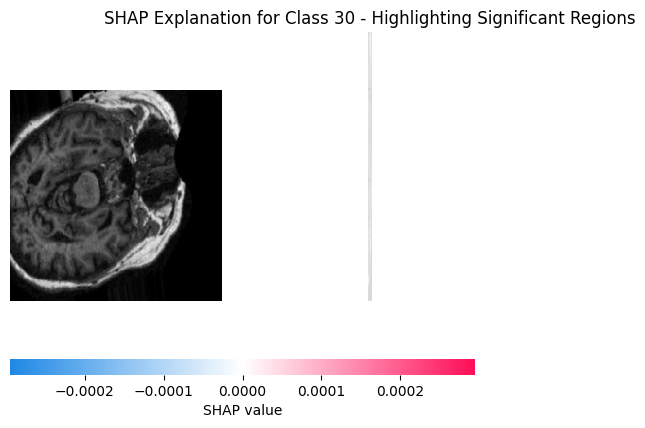

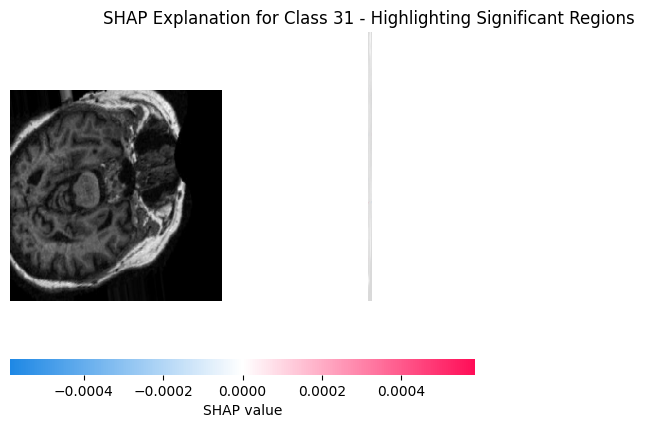

<Figure size 1000x800 with 0 Axes>

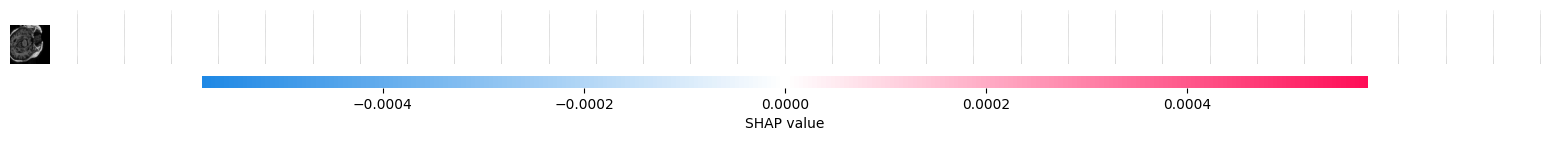

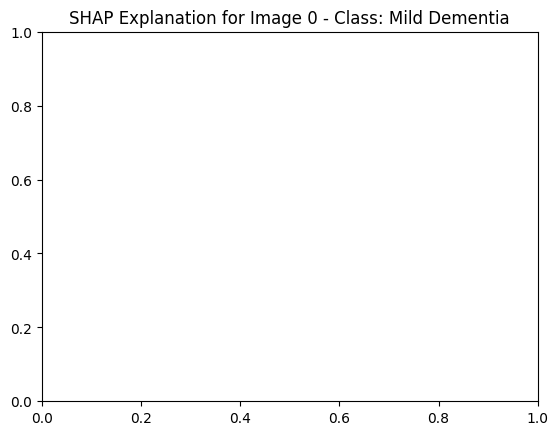

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# ---- SHAP Integration for Alzheimer's Insights ----

# Select a batch of images from the validation set for SHAP explanation
X_val_batch, y_val_batch = val_generator.__getitem__(0)  # Get the first batch from the validation generator

# Create a SHAP explainer using DeepExplainer
explainer = shap.DeepExplainer(model, X_val_batch[:100])  # Limiting to 100 samples for performance reasons

# Get SHAP values for the batch
shap_values = explainer.shap_values(X_val_batch[:100])

# Verify the shape of SHAP values
print(f"SHAP values shape: {[sv.shape for sv in shap_values]}")

# Plot the SHAP values for each class (for the first image in the batch)
for i in range(len(shap_values)):
    shap.image_plot([shap_values[i]], X_val_batch[:1], show=False)  # Only plot the first image
    plt.title(f"SHAP Explanation for Class {i} - Highlighting Significant Regions")
    plt.show()

# For a specific image in the batch:
index = 0  # Example: Select the first image in the batch
plt.figure(figsize=(10, 8))
shap.image_plot([shap_values[i] for i in range(len(shap_values))], X_val_batch[index:index+1])
plt.title(f"SHAP Explanation for Image {index} - Class: {class_labels[np.argmax(y_val_batch[index])]}")
plt.show()


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# ---- SHAP Integration for Alzheimer's Insights ----

# Select a batch of images from the validation set for SHAP explanation
X_val_batch, y_val_batch = val_generator.__getitem__(50)  # Get the first batch from the validation generator

# Select a single image for explanation
X_val_single_image = X_val_batch[0:1]  # Taking the first image from the batch

# Create a SHAP explainer using GradientExplainer
explainer = shap.GradientExplainer(model, X_val_batch[:100])  # Using a batch of images for the background

# Get SHAP values for the single image
shap_values_single = explainer.shap_values(X_val_single_image)



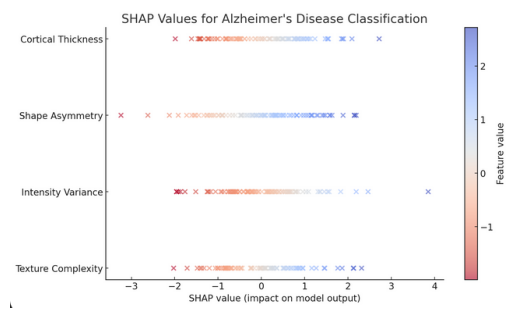

In [ ]:
# Plot the SHAP values for the single image
shap.image_plot(shap_values_single, X_val_single_image)
plt.title(f"SHAP Explanation for Alzheimer's Disease Classification {class_labels[np.argmax(y_val_batch[0])]}")
plt.show()
